In [1]:
pAth = "../code/"
include(pAth*"LotkaVolterra.jl")
include(pAth*"dataHandle.jl")
using Plots, Random;Random.seed!(123)

MersenneTwister(123)

# Demonstration of Lotka-Volterra competition model (3-species)

Generalized equation

\begin{equation}
    \dot{x} = x_{i}r_{i}\Big(1-\dfrac{\sum^{n}_{j=1}\alpha_{ij}x_{j}}{K_{i}}\Big) \text{ , which } \alpha_{ij} = 1 \text{ if }i==j
\end{equation}

In [2]:
x0 = [30., 20, 45] # initial population size
spName = ["org "*string(i) for i in 1:length(x0)] # organism names
pA = DataFrame( # known growth rates & carrying capacity parameters
    species = repeat(spName, inner=2),
    parType = repeat(["r", "k"], length(x0)),
    influSp = repeat([""], length(x0)*2),
    parValue = [.3, 1e2, .2, 50, .25, 40],
    unit = repeat([""], length(x0)*2)
)

,species,parType,influSp,parValue,unit
,String,String,String,Float64,String
1,org 1,r,,0.3,
2,org 1,k,,100.0,
3,org 2,r,,0.2,
4,org 2,k,,50.0,
5,org 3,r,,0.25,
6,org 3,k,,40.0,


In [3]:
tS = (0.,100.) # time scale
sEp = 1. # ode integration time-step
a0 = [[1,.3,.01] [1.7,1,.07] [.1,.1,1]] # interaction coefficients
rk = dtgb(pA,unique(pA[:,1]))
s = DataFrame(ode!(x0, rk[1:Int(length(rk)/2)], rk[Int(length(rk)/2+1):end], a0, tS, sEp))
print("")

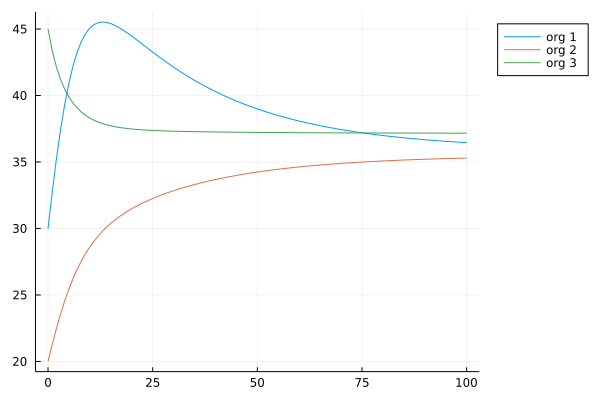

In [4]:
nAm = unique(pA[:,1])
plot(s[:,1],s[:,2], labels=nAm[1], color=1, legend=:outertopright)
plot!(s[:,1],s[:,3], labels=nAm[2], color=2)
plot!(s[:,1],s[:,4], labels=nAm[3], color=3)

# Decipher the 3-species simulation into three pairwise experiments

Short summary: pairwise time-series population dynamics data dropped to zero $\neq$ the species cannot survive in more species situations

In [5]:
s12 = DataFrame(ode!(x0[1:2], rk[1:2], rk[(1+length(nAm)):(2+length(nAm))], a0[1:2,1:2], tS, sEp))
s13 = DataFrame(ode!(x0[[1,3]], rk[[1,3]], rk[[(1+length(nAm)),(3+length(nAm))]], [[a0[1,1],a0[3,1]] [a0[1,3],a0[3,3]]], tS, sEp))
s23 = DataFrame(ode!(x0[2:3], rk[2:3], rk[(2+length(nAm)):(3+length(nAm))], a0[1:2,1:2], tS, sEp))
print("")

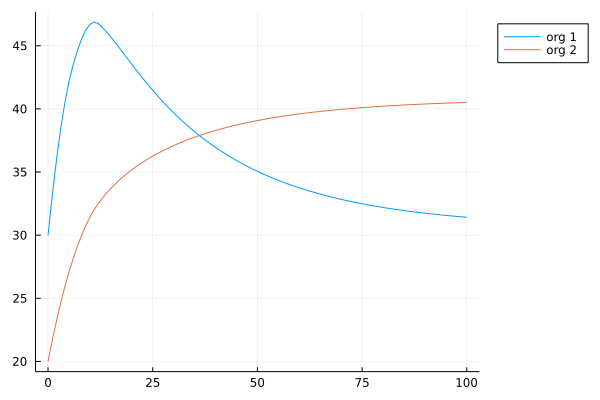

In [6]:
plot(s12[:,1],s12[:,2], labels=nAm[1], color=1, legend=:outertopright)
plot!(s12[:,1],s12[:,3], labels=nAm[2], color=2)

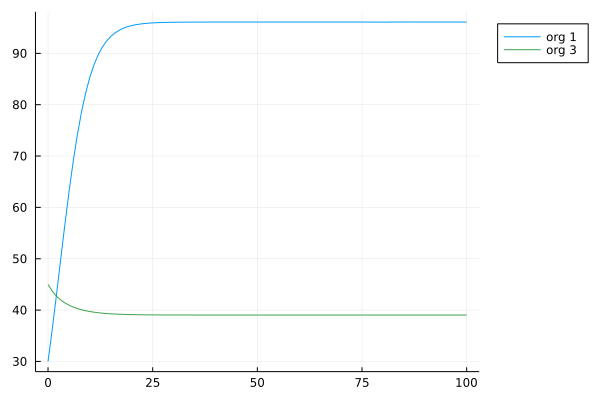

In [7]:
plot(s13[:,1],s13[:,2], labels=nAm[1], color=1, legend=:outertopright)
plot!(s13[:,1],s13[:,3], labels=nAm[3], color=3)

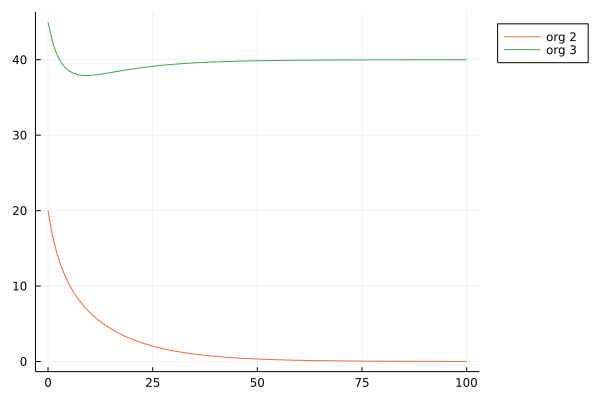

In [8]:
plot(s23[:,1],s23[:,2], labels=nAm[2], color=2, legend=:outertopright)
plot!(s23[:,1],s23[:,3], labels=nAm[3], color=3)

In [9]:
last(s23,7)

,timestamp,value1,value2
,Float64,Float64,Float64
1,94.0,0.0137683,39.9959
2,95.0,0.0128131,39.9965
3,96.0,0.0119237,39.9967
4,97.0,0.0110951,39.9967
5,98.0,0.010324,39.9967
6,99.0,0.00960671,39.9968
7,100.0,0.00893929,39.9969
